In [0]:
import pandas as pd
from sklearn import tree, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_orig = pd.read_csv("/content/gdrive/My Drive/Big Data Analytics/Data/fires_processed.csv", low_memory=False)

In [0]:
df = df_orig
le = preprocessing.LabelEncoder()
df['LABEL'] = df['STAT_CAUSE_DESCR']
df = df.drop('STAT_CAUSE_DESCR',axis=1)
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
df['STATE'] = le.fit_transform(df['STATE'])

df = df[['MONTH','LATITUDE','LONGITUDE', 'DAY_OF_WEEK', 'LABEL']]
df.head()

,MONTH,LATITUDE,LONGITUDE,DAY_OF_WEEK,LABEL
0,2,40.036944,-121.005833,6,Miscellaneous
1,5,38.933056,-120.404444,6,Lightning
2,5,38.984167,-120.735556,1,Debris Burning
3,6,38.559167,-119.913333,1,Lightning
4,6,38.559167,-119.933056,1,Lightning


In [0]:
# Grouping the causes into four major categories: Natural, Accidental, Malicious,
# and Other
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

df['LABEL'] = df['LABEL'].apply(lambda x: set_label(x))
df.dropna()
df.head()

,MONTH,LATITUDE,LONGITUDE,DAY_OF_WEEK,LABEL
0,2,40.036944,-121.005833,6,4
1,5,38.933056,-120.404444,6,1
2,5,38.984167,-120.735556,1,2
3,6,38.559167,-119.913333,1,1
4,6,38.559167,-119.933056,1,1


In [0]:
X = df.drop(['LABEL'], axis=1).values
y = df['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6204718686850782


In [0]:
# Save Model for exporting using joblib
# Note: Will be exported and used in Flask app
filename = 'wildfire_model.sav'
joblib.dump(clf_rf, filename)

# Must manually move file to correct location after it's generated

['wildfire_model.sav']

In [0]:
# Load and use model as a test
model = joblib.load('/content/gdrive/My Drive/Big Data Analytics/Model/wildfire_model.sav')

In [0]:
# Test that model is loaded properly
result = model.score(X_test, y_test)
result

0.6204718686850782

In [0]:
# See classes
model.classes_

array([1, 2, 3, 4])

Input Month: 10
Input Latititude: 30.124
Input Longitude: -82
Input Day of Week: 7


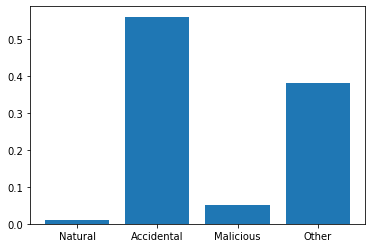

{'Accidental': 0.56, 'Malicious': 0.05, 'Natural': 0.01, 'Other': 0.38}

In [0]:
classes = {0: "Natural", 1: "Accidental", 2: "Malicious", 3: "Other" }

MONTH = int(input('Input Month: '))
LATITUDE = float(input('Input Latititude: '))
LONGITUDE = float(input('Input Longitude: '))
DAY_OF_WEEK = int(input('Input Day of Week: '))

prediction = model.predict_proba([[MONTH, LATITUDE, LONGITUDE, DAY_OF_WEEK]])[0]
result = {}
for i in range(len(prediction)):
  result[classes[i]] = prediction[i]

plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)), list(result.keys()))
plt.show()
result